# Build and train a neural network

In [1]:
%cd ../

/home/lln/Documentos/recreate_pytorch/PyNorch


In [11]:
import norch
import norch.nn as nn
import norch.optim as optim
import random
import math

random.seed(1)

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.sigmoid = nn.Sigmoid()
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x):
        out = self.fc1(x)
        out = self.sigmoid(out)
        out = self.fc2(out)
        
        return out

device = "cpu"
epochs = 1

model = MyModel().to(device)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)
loss_list = []

x_values = [0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ,
        4.4,  4.8,  5.2,  5.6,  6. ,  6.4,  6.8,  7.2,  7.6,  8. ,  8.4,
        8.8,  9.2,  9.6, 10. , 10.4, 10.8, 11.2, 11.6, 12. , 12.4, 12.8,
       13.2, 13.6, 14. , 14.4, 14.8, 15.2, 15.6, 16. , 16.4, 16.8, 17.2,
       17.6, 18. , 18.4, 18.8, 19.2, 19.6, 20.]

y_true = []
for x in x_values:
    y_true.append(math.pow(math.sin(x), 2))

batch_size = 1000


for epoch in range(epochs):
    for i, (x, target) in enumerate(zip(x_values, y_true)):
        x = norch.Tensor([[x] for _ in range(batch_size)]).T
        target = norch.Tensor([[target] for _ in range(batch_size)]).T

        x = x.to(device)
        target = target.to(device)

        outputs = model(x)

        loss = criterion(outputs, target)
        
        optimizer.zero_grad()
        loss.backward()
        print('loss_antes', loss)

        print('f1 antes', model.fc1.bias)
        print('f1 grad_antes', model.fc1.bias.grad)
        print('f2 antes', model.fc2.bias)
        print('f2 grad_antes', model.fc2.bias.grad)

        optimizer.step()
        print('\n')

        print('f1 depois', model.fc1.bias)
        print('f2 depois', model.fc2.bias)
        print('\n\n')

    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss[0]:.4f}')
    loss_list.append(loss[0])

loss_antes tensor([3.3399136066436768,], device="cpu", requires_grad=True)
f1 antes tensor([[0.6715301871299744,],
[-0.13446585834026337,],
[0.5245601534843445,],
[-0.9957879185676575,],
[-0.10922560840845108,],
[0.4430800676345825,],
[-0.5424755811691284,],
[0.8905413746833801,],
[0.8028548955917358,],
[-0.9388200044631958,]], device="cpu", requires_grad=True)
f1 grad_antes tensor([[0.7763990759849548,],
[-0.07534197717905045,],
[-0.7497915625572205,],
[0.1710733026266098,],
[-0.05041608214378357,],
[-0.020194964483380318,],
[-0.14156067371368408,],
[-0.1368660032749176,],
[-0.027204060927033424,],
[-0.0021885898895561695,]], device="cpu", requires_grad=True)
f2 antes tensor([[-0.5338311195373535,]], device="cpu", requires_grad=True)
f2 grad_antes tensor([[-3.655086040496826,]], device="cpu", requires_grad=True)


f1 depois tensor([[0.6707537770271301,],
[-0.13439051806926727,],
[0.5253099203109741,],
[-0.9959589838981628,],
[-0.1091751903295517,],
[0.4431002736091614,],
[-0.542334020

In [9]:
loss_list

[1.7061519622802734]

In [2]:
model

NameError: name 'model' is not defined

In [14]:
x = 0.4
input = norch.Tensor([[x]]).T
print(model(input))
print(math.pow(math.sin(x), 2))

tensor([[-1.4443700313568115,]], device="cpu", requires_grad=True)
0.1516466453264173


## Check loss

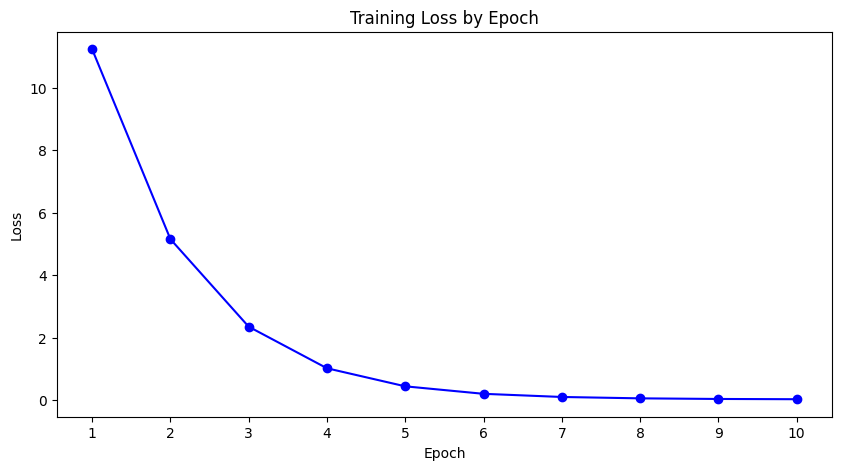

In [5]:
import matplotlib.pyplot as plt

epochs_list = range(1, len(loss_list) + 1)

plt.figure(figsize=(10, 5))

plt.plot(epochs_list, loss_list, 'b', marker='o')
plt.title('Training Loss by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(epochs_list)
plt.show()